# Pyspark TensorFlow Inference

## Image classification
Based on: https://www.tensorflow.org/tutorials/keras/save_and_load

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import tensorflow as tf

from tensorflow import keras

print(tf.version.VERSION)

2024-09-19 17:53:09.716362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 17:53:09.716424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 17:53:09.717968: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 17:53:09.727341: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 17:53:10.560200: W tensorflow/comp

2.15.0


In [2]:
import os

# Enable GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/usr/lib/cuda"

### Load and preprocess dataset

In [3]:
# load dataset as numpy arrays
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# flatten and normalize
train_images = train_images.reshape(-1, 784) / 255.0
test_images = test_images.reshape(-1, 784) / 255.0

In [5]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

### Define a model

In [6]:
# Define a simple sequential model
def create_model():
    model = tf.keras.models.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=[tf.metrics.SparseCategoricalAccuracy()])

    return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-09-19 17:53:16.366625: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31135 MB memory:  -> device: 0, name: Tesla V100-SXM3-32GB-H, pci bus id: 0000:34:00.0, compute capability: 7.0
2024-09-19 17:53:16.372845: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 31135 MB memory:  -> device: 1, name: Tesla V100-SXM3-32GB-H, pci bus id: 0000:36:00.0, compute capability: 7.0
2024-09-19 17:53:16.374187: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 31135 MB memory:  -> device: 2, name: Tesla V100-SXM3-32GB-H, pci bus id: 0000:39:00.0, compute capability: 7.0
2024-09-19 17:53:16.375507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 31135 MB memory:  -> device: 3, name: Tesla V100-SXM3-32GB-H, pc

### Train model

In [7]:
model.fit(train_images, 
          train_labels,  
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5


2024-09-19 17:53:18.892490: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f70820e8320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-19 17:53:18.892525: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM3-32GB-H, Compute Capability 7.0
2024-09-19 17:53:18.892532: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): Tesla V100-SXM3-32GB-H, Compute Capability 7.0
2024-09-19 17:53:18.892538: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (2): Tesla V100-SXM3-32GB-H, Compute Capability 7.0
2024-09-19 17:53:18.892544: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (3): Tesla V100-SXM3-32GB-H, Compute Capability 7.0
2024-09-19 17:53:18.892550: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (4): Tesla V100-SXM3-32GB-H, Compute Capability 7.0
2024-09-19 17:53:18.892556: I external/loca

1875/1875 [==============================] - 7s 2ms/step - loss: 0.2164 - sparse_categorical_accuracy: 0.9364 - val_loss: 0.1005 - val_sparse_categorical_accuracy: 0.9690
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0964 - sparse_categorical_accuracy: 0.9706 - val_loss: 0.0820 - val_sparse_categorical_accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - sparse_categorical_accuracy: 0.9779 - val_loss: 0.0716 - val_sparse_categorical_accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0529 - sparse_categorical_accuracy: 0.9831 - val_loss: 0.0644 - val_sparse_categorical_accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0432 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0668 - val_sparse_categorical_accuracy: 0.9790


In [8]:
test_img = test_images[:1]
prediction = model.predict(test_img)
prediction

1/1 [==============================] - 0s 141ms/step


array([[ -7.0718017 ,  -9.045143  ,  -3.8060184 ,  -0.28596532,
        -16.564373  ,  -7.2336397 , -19.096333  ,  12.899001  ,
         -7.2455015 ,  -3.843678  ]], dtype=float32)

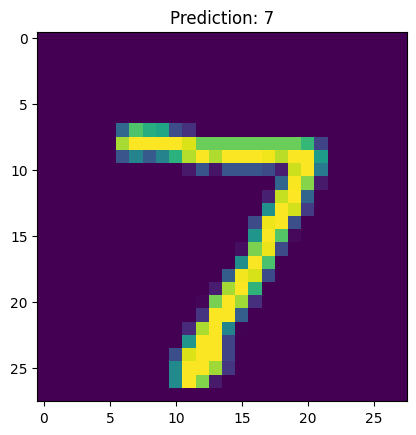

In [9]:
plt.figure()
plt.title("Prediction: {}".format(np.argmax(prediction)))
plt.imshow(test_img.reshape(28,28))
plt.show()

### Save Model

In [10]:
subprocess.call("rm -rf mnist_model".split())

0

In [11]:
model.save('mnist_model')

INFO:tensorflow:Assets written to: mnist_model/assets


INFO:tensorflow:Assets written to: mnist_model/assets


### Inspect saved model

In [12]:
subprocess.call("tree mnist_model".split())

mnist_model
├── assets
├── fingerprint.pb
├── keras_metadata.pb
├── saved_model.pb
└── variables
    ├── variables.data-00000-of-00001
    └── variables.index

2 directories, 5 files


0

In [13]:
subprocess.call("saved_model_cli show --dir mnist_model --tag_set serve --signature_def serving_default".split())

2024-09-19 17:54:00.154879: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 17:54:00.155122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 17:54:00.156618: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 17:54:00.164160: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 17:54:00.951712: W tensorflow/comp

The given SavedModel SignatureDef contains the following input(s):
  inputs['dense_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 784)
      name: serving_default_dense_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 10)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


0

### Load model

In [14]:
new_model = tf.keras.models.load_model('mnist_model')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
new_model.inputs

[<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>]

### Predict

In [16]:
new_model.predict(test_images[:1])

1/1 [==============================] - 0s 135ms/step


array([[ -7.0718017 ,  -9.045143  ,  -3.8060184 ,  -0.28596532,
        -16.564373  ,  -7.2336397 , -19.096333  ,  12.899001  ,
         -7.2455015 ,  -3.843678  ]], dtype=float32)

## PySpark

In [17]:
import pandas as pd
from pyspark.sql import SparkSession

In [18]:
num_threads = 6

# Running Spark locally for demonstration.

_config = {
    "spark.master": f"local[{num_threads}]",
    "spark.driver.host": "127.0.0.1",
    "spark.task.maxFailures": "1",
    "spark.driver.memory": "8g",
    "spark.executor.memory": "8g",
    "spark.sql.execution.pyspark.udf.simplifiedTraceback.enabled": "false",
    "spark.sql.pyspark.jvmStacktrace.enabled": "true",
    "spark.sql.execution.arrow.pyspark.enabled": "true",
    "spark.python.worker.reuse": "true",
}
spark = SparkSession.builder.appName("spark-dl-example")
for key, value in _config.items():
    spark = spark.config(key, value)
spark = spark.getOrCreate()

sc = spark.sparkContext

24/09/19 17:54:06 WARN Utils: Your hostname, dgx2h0194.spark.sjc4.nvmetal.net resolves to a loopback address: 127.0.1.1; using 10.150.30.2 instead (on interface enp134s0f0np0)
24/09/19 17:54:06 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/19 17:54:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Convert numpy array to Spark DataFrame (via Pandas DataFrame)

In [19]:
# numpy array to pandas DataFrame
test_pdf = pd.DataFrame(test_images)
test_pdf.shape

(10000, 784)

In [20]:
%%time
df = spark.createDataFrame(test_pdf)

CPU times: user 256 ms, sys: 149 ms, total: 405 ms
Wall time: 3.11 s


### Save as Parquet (784 columns of float)

In [21]:
%%time
df.write.mode("overwrite").parquet("mnist_784")

24/09/19 17:54:12 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
24/09/19 17:54:13 WARN TaskSetManager: Stage 0 contains a task of very large size (61295 KiB). The maximum recommended task size is 1000 KiB.


CPU times: user 15.8 ms, sys: 16.9 ms, total: 32.7 ms
Wall time: 8.56 s


### Save as Parquet (1 column of 784 float)

In [22]:
%%time
test_pdf['data'] = test_pdf.values.tolist()
pdf = test_pdf[['data']]
pdf.shape

CPU times: user 309 ms, sys: 152 ms, total: 462 ms
Wall time: 459 ms


(10000, 1)

In [23]:
%%time
df = spark.createDataFrame(pdf)

CPU times: user 1.49 s, sys: 473 ms, total: 1.97 s
Wall time: 2.15 s


In [24]:
%%time
df.write.mode("overwrite").parquet("mnist_1")

24/09/19 17:54:23 WARN TaskSetManager: Stage 1 contains a task of very large size (61298 KiB). The maximum recommended task size is 1000 KiB.


CPU times: user 7.4 ms, sys: 3.87 ms, total: 11.3 ms
Wall time: 2.01 s


### Check arrow memory configuration

In [25]:
spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "128")
# This line will fail if the vectorized reader runs out of memory
assert len(df.head()) > 0, "`df` should not be empty" 

24/09/19 17:54:25 WARN TaskSetManager: Stage 2 contains a task of very large size (61298 KiB). The maximum recommended task size is 1000 KiB.


## Inference using Spark DL API

### 1 column of 784 float

In [26]:
import numpy as np
import os
import pandas as pd

from pyspark.ml.functions import predict_batch_udf
from pyspark.sql.functions import array, col, struct
from pyspark.sql.types import ArrayType, FloatType, Union, Dict

In [27]:
# get absolute path to model
model_dir = "{}/mnist_model".format(os.getcwd())

In [28]:
def predict_batch_fn():
    import tensorflow as tf

    # Enable GPU memory growth
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(e)

    model = tf.keras.models.load_model(model_dir)
    def predict(inputs: np.ndarray) -> np.ndarray:
        return model.predict(inputs)
        
    return predict

In [29]:
mnist = predict_batch_udf(predict_batch_fn,
                          return_type=ArrayType(FloatType()),
                          batch_size=1024,
                          input_tensor_shapes=[[784]])

In [30]:
df = spark.read.parquet("mnist_1")
len(df.columns)

1

In [31]:
df.show(5)

+--------------------+
|                data|
+--------------------+
|[0.0, 0.0, 0.0, 0...|
|[0.0, 0.0, 0.0, 0...|
|[0.0, 0.0, 0.0, 0...|
|[0.0, 0.0, 0.0, 0...|
|[0.0, 0.0, 0.0, 0...|
+--------------------+
only showing top 5 rows



In [32]:
%%time
# first pass caches model/fn
preds = df.withColumn("preds", mnist(struct(df.columns))).collect()

2024-09-19 17:54:30.681133: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 17:54:30.681278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 17:54:30.682729: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 17:54:30.690395: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 17:54:31.506921: W tensorflow/comp

CPU times: user 482 ms, sys: 222 ms, total: 704 ms
Wall time: 14.9 s


In [33]:
%%time
preds = df.withColumn("preds", mnist(*df.columns)).collect()

1/1 [==============================] - 0s 67ms/step


CPU times: user 1.13 s, sys: 559 ms, total: 1.68 s
Wall time: 10.6 s


In [34]:
%%time
preds = df.withColumn("preds", mnist(*[col(c) for c in df.columns])).collect()

1/1 [==============================] - 0s 225ms/step


CPU times: user 598 ms, sys: 222 ms, total: 820 ms
Wall time: 10.6 s


#### Check predictions

In [35]:
preds = df.withColumn("preds", mnist(*df.columns)).limit(10).toPandas()
preds

1/1 [==============================] - 0s 25ms/step


,data,preds
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-7.071802, -9.045142, -3.8060186, -0.28596532..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.2210913, 3.6315014, 13.498906, -1.3594989,..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-10.966072, 8.9617405, -3.9147115, -8.311716,..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.10566, -13.384632, 0.4970912, -9.208162, -..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.296481, -14.630078, -4.344841, -11.41271, ..."
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13.062172, 11.03082, -8.451119, -8.813015, -..."
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-14.237131, -9.665514, -5.1844296, -8.672207,..."
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-10.750337, -10.836702, -4.262484, 1.1857605,..."
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-17.148703, -16.219534, -5.5909033, -8.752592..."
9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-17.127, -16.412247, -11.7112255, -0.44144145..."


In [36]:
sample = preds.iloc[0]
sample.preds

array([ -7.071802  ,  -9.045142  ,  -3.8060186 ,  -0.28596532,
       -16.564371  ,  -7.2336397 , -19.09633   ,  12.899001  ,
        -7.2455015 ,  -3.8436785 ], dtype=float32)

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
prediction = np.argmax(sample.preds)
img = np.array(sample.data).reshape(28,28)

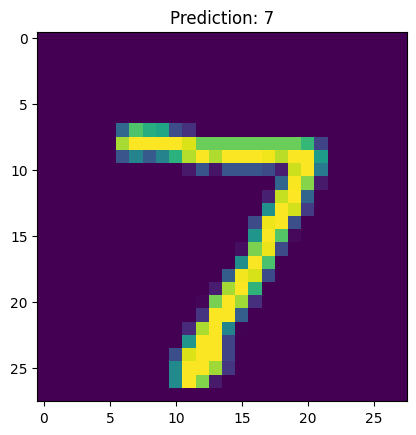

In [39]:
plt.figure()
plt.title("Prediction: {}".format(prediction))
plt.imshow(img)
plt.show()

### 784 columns of float

In [40]:
import numpy as np

from pyspark.ml.functions import predict_batch_udf
from pyspark.sql.functions import array, col, struct
from pyspark.sql.types import ArrayType, FloatType, Union, Dict

In [41]:
def predict_batch_fn():
    import tensorflow as tf
    model = tf.keras.models.load_model(model_dir)
    def predict(inputs: np.ndarray) -> np.ndarray:
        return model.predict(inputs)
        
    return predict

In [42]:
mnist = predict_batch_udf(predict_batch_fn,
                          return_type=ArrayType(FloatType()),
                          batch_size=1024,
                          input_tensor_shapes=[[784]])

In [43]:
df = spark.read.parquet("mnist_784")
len(df.columns)

784

In [44]:
%%time
preds = df.withColumn("preds", mnist(struct(*df.columns))).collect()

2024-09-19 17:55:09.183599: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 17:55:09.183737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 17:55:09.185177: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 17:55:09.192832: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 17:55:09.986153: W tensorflow/comp

CPU times: user 757 ms, sys: 238 ms, total: 995 ms
Wall time: 45.7 s


In [45]:
%%time
preds = df.withColumn("preds", mnist(array(*df.columns))).collect()

1/1 [==============================] - 0s 67ms/step


CPU times: user 1.26 s, sys: 536 ms, total: 1.8 s
Wall time: 20.7 s


In [46]:
# should raise ValueError
# preds = df.withColumn("preds", mnist(*df.columns)).collect()

### Check prediction

In [47]:
preds = df.withColumn("preds", mnist(struct(df.columns))).limit(10).toPandas()
preds

1/1 [==============================] - 0s 133ms/step                (0 + 1) / 1]


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,preds
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-7.071802, -9.045142, -3.8060186, -0.28596532..."
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-6.2210913, 3.6315014, 13.498906, -1.3594989,..."
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-10.966072, 8.9617405, -3.9147115, -8.311716,..."
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[12.10566, -13.384632, 0.4970912, -9.208162, -..."
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-6.296481, -14.630078, -4.344841, -11.41271, ..."
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-13.062172, 11.03082, -8.451119, -8.813015, -..."
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-14.237131, -9.665514, -5.1844296, -8.672207,..."
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-10.750337, -10.836702, -4.262484, 1.1857605,..."
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-17.148703, -16.219534, -5.5909033, -8.752592..."
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-17.127, -16.412247, -11.7112255, -0.44144145..."


In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
sample = preds.iloc[0]
sample.preds

array([ -7.071802  ,  -9.045142  ,  -3.8060186 ,  -0.28596532,
       -16.564371  ,  -7.2336397 , -19.09633   ,  12.899001  ,
        -7.2455015 ,  -3.8436785 ], dtype=float32)

In [50]:
prediction = np.argmax(sample.preds)
img = sample.drop('preds').to_numpy(dtype=float)
img = np.array(img).reshape(28,28)

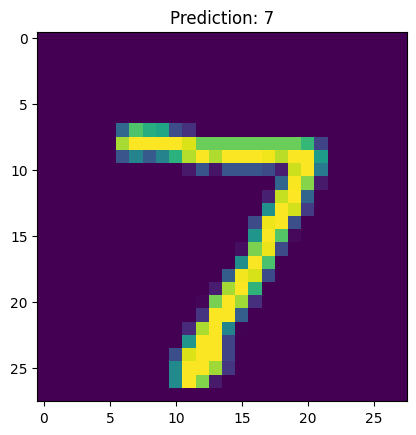

In [51]:
plt.figure()
plt.title("Prediction: {}".format(prediction))
plt.imshow(img)
plt.show()

### Using Triton Inference Server

Note: you can restart the kernel and run from this point to simulate running in a different node or environment.

In [52]:
import os
from pyspark.ml.functions import predict_batch_udf
from pyspark.sql.functions import col, struct
from pyspark.sql.types import ArrayType, FloatType

In [53]:
%%bash
# copy model to expected layout for Triton
rm -rf models
mkdir -p models/mnist_model/1
cp -r mnist_model models/mnist_model/1/model.savedmodel

# add config.pbtxt
cp models_config/mnist_model/config.pbtxt models/mnist_model/config.pbtxt

#### Start Triton Server on each executor

In [54]:
num_executors = 1
triton_models_dir = "{}/models".format(os.getcwd())
nodeRDD = sc.parallelize(list(range(num_executors)), num_executors)

def start_triton(it):
    import docker
    import time
    import tritonclient.grpc as grpcclient
    
    client=docker.from_env()
    containers=client.containers.list(filters={"name": "spark-triton"})
    if containers:
        
        print(">>>> containers: {}".format([c.short_id for c in containers]))
    else:
        container=client.containers.run(
            "nvcr.io/nvidia/tritonserver:23.04-py3", "tritonserver --model-repository=/models",
            detach=True,
            device_requests=[docker.types.DeviceRequest(device_ids=["0"], capabilities=[['gpu']])],
            name="spark-triton",
            network_mode="host",
            remove=True,
            shm_size="64M",
            volumes={triton_models_dir: {"bind": "/models", "mode": "ro"}}
        )
        print(">>>> starting triton: {}".format(container.short_id))

        # wait for triton to be running
        time.sleep(15)
        client = grpcclient.InferenceServerClient("localhost:8001")
        ready = False
        while not ready:
            try:
                ready = client.is_server_ready()
            except Exception as e:
                time.sleep(5)
            
    return [True]

nodeRDD.barrier().mapPartitions(start_triton).collect()

>>>> starting triton: 909b8a1996f2                                  (0 + 1) / 1]


[True]

In [55]:
df = spark.read.parquet("mnist_1")
df.schema

StructType([StructField('data', ArrayType(DoubleType(), True), True)])

#### Using custom predict_batch_fn

In [56]:
def predict_batch_fn():
    import numpy as np
    import tritonclient.grpc as grpcclient
    client = grpcclient.InferenceServerClient("localhost:8001")
    def predict(inputs):
        request = [grpcclient.InferInput("dense_input", inputs.shape, "FP32")]
        request[0].set_data_from_numpy(inputs.astype(np.float32))
        response = client.infer("mnist_model", inputs=request)
        return response.as_numpy("dense_1")
    return predict

In [57]:
mnist = predict_batch_udf(predict_batch_fn,
                          input_tensor_shapes=[[784]],
                          return_type=ArrayType(FloatType()),
                          batch_size=8192)

In [58]:
%%time
preds = df.withColumn("preds", mnist(struct("data"))).collect()

CPU times: user 455 ms, sys: 121 ms, total: 576 ms
Wall time: 4.28 s


In [59]:
%%time
preds = df.withColumn("preds", mnist("data")).collect()

CPU times: user 1.04 s, sys: 461 ms, total: 1.5 s
Wall time: 3.42 s


In [60]:
%%time
preds = df.withColumn("preds", mnist(col("data"))).collect()

CPU times: user 599 ms, sys: 198 ms, total: 797 ms
Wall time: 2.54 s


#### Check predictions

In [61]:
preds = df.withColumn("preds", mnist(*df.columns)).limit(10).toPandas()
preds

,data,preds
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-7.071802, -9.045142, -3.8060186, -0.28596532..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.2210913, 3.6315014, 13.498906, -1.3594989,..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-10.966072, 8.9617405, -3.9147115, -8.311716,..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[12.10566, -13.384632, 0.4970912, -9.208162, -..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.296481, -14.630078, -4.344841, -11.41271, ..."
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-13.062172, 11.03082, -8.451119, -8.813015, -..."
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-14.237131, -9.665514, -5.1844296, -8.672207,..."
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-10.750337, -10.836702, -4.262484, 1.1857605,..."
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-17.148703, -16.219534, -5.5909033, -8.752592..."
9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-17.127, -16.412247, -11.7112255, -0.44144145..."


In [62]:
import matplotlib.pyplot as plt
import numpy as np

In [63]:
sample = preds.iloc[0]
sample.preds

array([ -7.071802  ,  -9.045142  ,  -3.8060186 ,  -0.28596532,
       -16.564371  ,  -7.2336397 , -19.09633   ,  12.899001  ,
        -7.2455015 ,  -3.8436785 ], dtype=float32)

In [64]:
prediction = np.argmax(sample.preds)
img = np.array(sample.data).reshape(28,28)

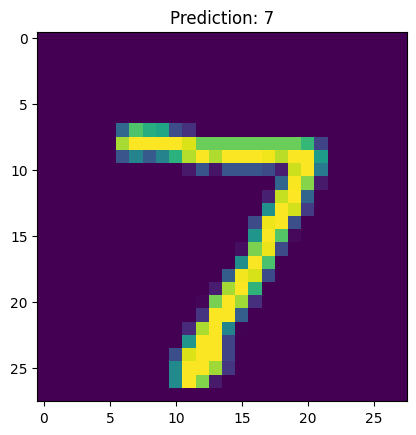

In [65]:
plt.figure()
plt.title("Prediction: {}".format(prediction))
plt.imshow(img)
plt.show()

#### Using generic Triton function

In [66]:
def triton_fn(triton_uri, model_name):
    import numpy as np
    import tritonclient.grpc as grpcclient

    np_types = {
      "BOOL": np.dtype(np.bool8),
      "INT8": np.dtype(np.int8),
      "INT16": np.dtype(np.int16),
      "INT32": np.dtype(np.int32),
      "INT64": np.dtype(np.int64),
      "FP16": np.dtype(np.float16),
      "FP32": np.dtype(np.float32),
      "FP64": np.dtype(np.float64),
      "FP64": np.dtype(np.double),
      "BYTES": np.dtype(object)
    }

    client = grpcclient.InferenceServerClient(triton_uri)
    model_meta = client.get_model_metadata(model_name)

    def predict(inputs):
        if isinstance(inputs, np.ndarray):
            # single ndarray input
            request = [grpcclient.InferInput(model_meta.inputs[0].name, inputs.shape, model_meta.inputs[0].datatype)]
            request[0].set_data_from_numpy(inputs.astype(np_types[model_meta.inputs[0].datatype]))
        else:
            # dict of multiple ndarray inputs
            request = [grpcclient.InferInput(i.name, inputs[i.name].shape, i.datatype) for i in model_meta.inputs]
            for i in request:
                i.set_data_from_numpy(inputs[i.name()].astype(np_types[i.datatype()]))

        response = client.infer(model_name, inputs=request)

        if len(model_meta.outputs) > 1:
            # return dictionary of numpy arrays
            return {o.name: response.as_numpy(o.name) for o in model_meta.outputs}
        else:
            # return single numpy array
            return response.as_numpy(model_meta.outputs[0].name)

    return predict

In [67]:
from functools import partial

predict = predict_batch_udf(partial(triton_fn, "localhost:8001", "mnist_model"),
                            return_type=ArrayType(FloatType()),
                            input_tensor_shapes=[[784]],
                            batch_size=8192)

In [68]:
%%time
preds = df.withColumn("preds", predict(struct("data"))).collect()

/tmp/ipykernel_3605077/519413998.py:6: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)


CPU times: user 418 ms, sys: 101 ms, total: 519 ms
Wall time: 3.24 s


In [69]:
%%time
preds = df.withColumn("preds", predict("data")).collect()

CPU times: user 1.16 s, sys: 421 ms, total: 1.58 s
Wall time: 3.2 s


In [70]:
%%time
preds = df.withColumn("preds", predict(col("data"))).collect()

CPU times: user 506 ms, sys: 125 ms, total: 631 ms
Wall time: 2.47 s


#### Stop Triton Server on each executor

In [71]:
def stop_triton(it):
    import docker
    import time
    
    client=docker.from_env()
    containers=client.containers.list(filters={"name": "spark-triton"})
    print(">>>> stopping containers: {}".format([c.short_id for c in containers]))
    if containers:
        container=containers[0]
        container.stop(timeout=120)

    return [True]

nodeRDD.barrier().mapPartitions(stop_triton).collect()

>>>> stopping containers: ['909b8a1996f2']


[True]

In [72]:
spark.stop()